In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# three nodes A, B, C with connecting links between them
nodes = [0, 1, 2]
pmap = {"A": 0, "B": 1, "C": 2}

distances = np.array(
    [
        [0, 1, 1],
        [1, 0, 2],
        [1, 2, 0]
    ]
)

In [67]:
def add_random_objects(inventory, incoming=1):
    for k, v in inventory.items():
        for n in range(incoming):
            obj = np.random.randint(0, 3)
            if obj != k:
                v.append(obj)
    return inventory

In [177]:
initial_inventory_size = 100
inventory = {}

for node in nodes:
    inventory[node] = []
    for i in range(initial_inventory_size):
        obj = np.random.randint(0, 3)
        if obj != node:
            inventory[node].append(obj)

truck_capacity = 10

trucks = {
    0: [],
    1: [],
    2: []
}

truck_locations = [0, 2, 1]

tmap = {
    0: {0: 1, 1: 0},
    1: {0: 2, 2: 0},
    2: {1: 2, 2: 1}
}

M = {}

In [178]:
iterations = 1000

for t in range(iterations):
    
    # fill trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]
        destination = tmap[truck][node]
        
        for obj in inventory[node]:
            if obj == destination:
                inventory[node].remove(obj)
                boot.append(obj)
            if len(boot) == truck_capacity:
                break
        if len(boot) > truck_capacity:
            print("error")
    
    empty_spots = np.sum([truck_capacity - len(boot) for boot in trucks.values()])
    inventory_size = np.sum([len(inventory[node]) for node in nodes])
    
    # move trucks
    truck_locations = [tmap[truck][origin] for truck, origin in enumerate(truck_locations)]
    # print(truck_locations)
    
    # unload trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]
        
        counter = 0
        for obj in boot:
            boot.pop()
            
    # grow inventory
    inventory = add_random_objects(inventory, incoming=5)
    
    M[t] = {
        "empty_spots": empty_spots,
        "inventory_size": inventory_size
    }

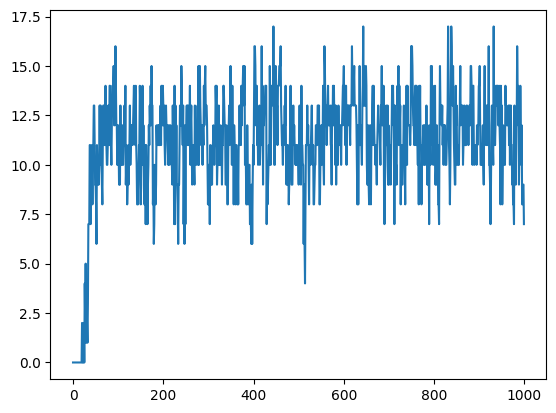

In [179]:
plt.plot([M[t]["empty_spots"] for t in M.keys()])

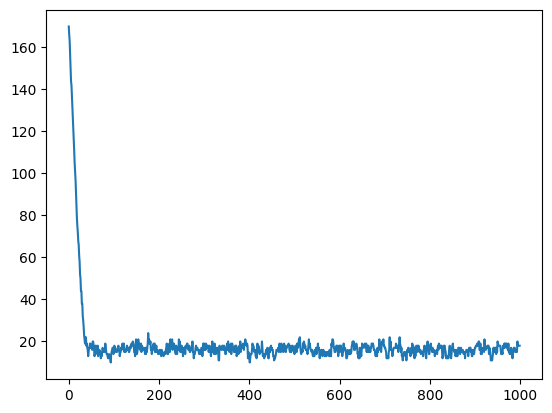

In [180]:
plt.plot([M[t]["inventory_size"] for t in M.keys()])

In [181]:
def load_shared_truck(storage, boot):
    counts = np.bincount(storage, minlength=3)
    amax = np.argmax(counts)
    
    if len(boot) == 0:
        # try fill to capacity
        free_space = truck_capacity - len(boot)
        
        if counts[amax] <= free_space:
            for i in range(counts[amax]):
                storage.remove(amax)
                boot.append(amax)
        else:
            for i in range(truck_capacity):
                storage.remove(amax)
                boot.append(amax)
        
        free_space = truck_capacity - len(boot)
        
        if free_space > 0:
            for i in range(free_space):
                try:
                    boot.append(storage.pop())
                except IndexError:
                    break
    else:
        boot_elements = np.bincount(boot, minlength=3)
        boot_amax = np.argmax(boot_elements)
        free_space = truck_capacity - len(boot)
        
        if counts[boot_amax] <= free_space:
            for i in range(counts[boot_amax]):
                storage.remove(boot_amax)
                boot.append(boot_amax)
        else:
            for i in range(free_space):
                # print(boot_amax, boot, storage)
                storage.remove(boot_amax)
                boot.append(boot_amax)
        
        free_space = truck_capacity - len(boot)
        
        if free_space > 0:
            for i in range(free_space):
                try:
                    boot.append(storage.pop())
                except IndexError:
                    break
    return storage, boot

In [200]:
initial_inventory_size = 100
inventory = {}

for node in nodes:
    inventory[node] = []
    for i in range(initial_inventory_size):
        obj = np.random.randint(0, 3)
        if obj != node:
            inventory[node].append(obj)

truck_capacity = 100

trucks = {
    0: [],
    1: [],
    2: []
}

truck_locations = [0, 2, 1]

tmap = {
    0: {0: 1, 1: 0},
    1: {0: 2, 2: 0},
    2: {1: 2, 2: 1}
}

M = {}

In [201]:
iterations = 1000

for t in range(iterations):
    
    # fill trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]        
        inventory[node], boot = load_shared_truck(inventory[node], boot)
    
    empty_spots = np.sum([truck_capacity - len(boot) for boot in trucks.values()])
    inventory_size = np.sum([len(inventory[node]) for node in nodes])
    
    # move trucks
    truck_locations = [np.argmax(np.bincount(boot, minlength=3)) for truck, boot in trucks.items()]
    print(truck_locations)
    
    # unload trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]
        
        counter = 0
        for obj in boot:
            if obj == node:
                boot.pop()

    # grow inventory
    inventory = add_random_objects(inventory, incoming=5)
    
    M[t] = {
        "empty_spots": empty_spots,
        "inventory_size": inventory_size
    }

[1, 1, 2]
[1, 1, 2]
[1, 1, 2]
[1, 1, 2]
[1, 1, 2]
[1, 1, 2]
[1, 1, 0]
[1, 0, 2]
[1, 2, 2]
[0, 0, 2]
[1, 2, 2]
[1, 2, 2]
[2, 2, 2]
[1, 2, 2]
[0, 1, 0]
[2, 0, 0]
[0, 1, 0]
[1, 0, 0]
[2, 0, 0]
[1, 2, 0]
[1, 0, 2]
[1, 2, 0]
[2, 0, 2]
[1, 2, 2]
[0, 0, 2]
[2, 0, 1]
[0, 1, 2]
[1, 0, 0]
[0, 1, 0]
[1, 0, 0]
[1, 1, 0]
[2, 1, 1]
[1, 0, 1]
[1, 1, 1]
[1, 0, 2]
[0, 1, 0]
[1, 0, 0]
[1, 2, 0]
[2, 1, 1]
[1, 0, 0]
[0, 1, 0]
[1, 2, 0]
[0, 0, 2]
[1, 1, 1]
[2, 1, 2]
[1, 0, 2]
[0, 2, 1]
[2, 2, 2]
[0, 2, 1]
[1, 0, 0]
[0, 2, 0]
[1, 1, 1]
[0, 0, 1]
[1, 0, 2]
[2, 2, 0]
[0, 0, 2]
[2, 0, 0]
[1, 1, 0]
[0, 2, 2]
[0, 1, 2]
[2, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[1, 0, 2]
[0, 2, 0]
[2, 0, 0]
[1, 2, 0]
[2, 0, 1]
[0, 1, 2]
[1, 2, 1]
[0, 0, 0]
[1, 0, 2]
[0, 1, 1]
[2, 0, 0]
[1, 1, 0]
[0, 0, 1]
[2, 0, 2]
[0, 1, 2]
[1, 2, 1]
[1, 0, 1]
[2, 2, 0]
[0, 2, 1]
[1, 0, 0]
[0, 1, 0]
[2, 2, 0]
[1, 2, 1]
[0, 0, 2]
[0, 0, 1]
[1, 1, 0]
[0, 2, 1]
[1, 1, 0]
[0, 0, 1]
[1, 0, 0]
[0, 2, 0]
[2, 0, 0]
[0, 1, 1]
[1, 2, 0]
[0, 0, 1]
[1, 0, 2]


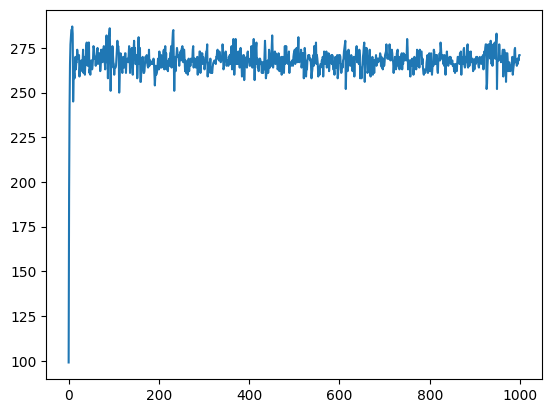

In [197]:
plt.plot([M[t]["empty_spots"] for t in M.keys()])

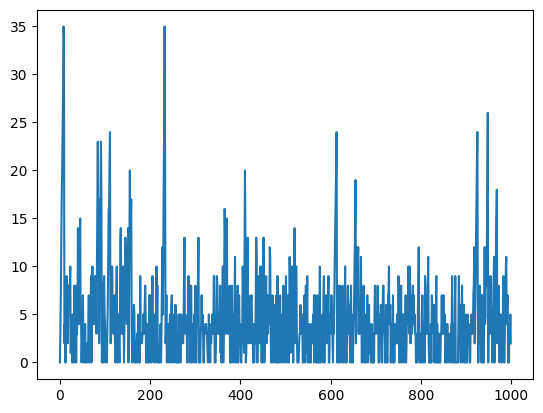

In [198]:
plt.plot([M[t]["inventory_size"] for t in M.keys()])